# load the data

In [304]:
ts <- read.csv("data/timeseries.csv")

# filter the data

In [305]:
ts <- ts[ts$time == 100, ]
ts <- ts[ts$sim_number %in% c(30, 60, 100), ]

# calculate assembly index of integers

In [306]:
ai <- read.csv("Assembly-10000.csv")

for (i in 1:nrow(ts)) {
  this_int <- ts$integer[i]
  this_ai <- ai$assemblyindex[ai$integer == this_int]
  if (length(this_ai) == 0) {
    this_ai <- 17
  }
  ts$assemblyindex[i] <- this_ai
}

# calculate the weighted average over each chemostat

In [307]:
ts <- ts %>%
  group_by(sim_number, chemostat_id) %>%
  summarize(
    mean_ai = sum(assemblyindex * frequency) / sum(frequency), # Weighted mean
    sd_ai = sqrt(sum(frequency * (assemblyindex - mean(assemblyindex))^2) / sum(frequency)), # Weighted SD
    .groups = "drop"
  )

# append the distance from source

In [308]:
dist <- read.csv("distance_from_source.csv")

for (i in 1:nrow(ts)) {
    this_sim_number <- ts$sim_number[i]
    this_chemostat_id <- ts$chemostat_id[i]
    this_dist <- dist$distance_from_source[dist$sim_number == this_sim_number & dist$chemostat_id == this_chemostat_id]
    ts$distance[i] <- this_dist
}

Warning message:
“Unknown or uninitialised column: `distance`.”


# plot everything

In [ ]:
p <- ggplot(ts, aes(x = distance, y = mean_ai, color = factor(sim_number))) +
  geom_point(alpha = 0.40) +
  # geom_errorbar(aes(ymin = mean_ai - sd_ai, ymax = mean_ai + sd_ai), width = 0.1) + # Add error bars
  geom_smooth(data = ts %>% filter(sim_number == 30), method = "loess", span = 4.20, se = FALSE) +  # Optional: Add trend lines
  geom_smooth(data = ts %>% filter(sim_number == 60, distance < 6), method = "loess", span = 0.75, se = FALSE) +  # Optional: Add trend lines
  geom_smooth(data = ts %>% filter(sim_number == 100), method = "loess", span = 4.20, se = FALSE) +  # Optional: Add trend lines
  labs(
    x = "Distance",
    y = "Mean AI",
    color = "sim_number"
  ) +
  annotate("rect", xmin = 4.5, xmax = 5.5, ymin = 3.5, ymax = 4.5, 
           color = "grey", fill = NA, linetype = "dashed") +
  annotate("text", x = 3, y = 5, label = TeX("$k_d = 10^{-4}$"), size = 3, color = scales::hue_pal()(3)[1]) +
  annotate("text", x = 5, y = 5, label = TeX("$k_d = 10^{-2}$"), size = 3, color = scales::hue_pal()(3)[2]) +
  annotate("text", x = 7, y = 5, label = TeX("$k_d = 10^{1}$"), size = 3, color = scales::hue_pal()(3)[3]) +
  theme_minimal() + 
  theme(legend.position = "none")

# print(p)

# ggsave(filename = "figs/08C_distance-from-source.pdf", plot = p, width = 80, height = 70, units = "mm")

# load and filter the data again

In [310]:
ts <- read.csv("data/timeseries.csv")

ts <- ts[ts$time == 100, ]
ts <- ts[ts$sim_number %in% c(30, 60, 100), ]

ai <- read.csv("Assembly-10000.csv")

for (i in 1:nrow(ts)) {
  this_int <- ts$integer[i]
  this_ai <- ai$assemblyindex[ai$integer == this_int]
  if (length(this_ai) == 0) {
    this_ai <- 17
  }
  ts$assemblyindex[i] <- this_ai
}

dist <- read.csv("distance_from_source.csv")

for (i in 1:nrow(ts)) {
    this_sim_number <- ts$sim_number[i]
    this_chemostat_id <- ts$chemostat_id[i]
    this_dist <- dist$distance_from_source[dist$sim_number == this_sim_number & dist$chemostat_id == this_chemostat_id]
    ts$distance[i] <- this_dist
}

# filter for chemostats sim_number = 100 and distance = 5

In [311]:
ts <- ts[ts$sim_number == 100, ]
ts <- ts[ts$distance == 5, ]

In [333]:
p2 <- ggplot(ts, aes(x = integer, y = frequency, color = factor(chemostat_id))) +
  # geom_point(alpha = 1.0) +
  # scale_x_log10() +
  scale_y_log10() +
  geom_density(aes(y = ..scaled..), adjust = 2, alpha = 1.0) +
  labs(
    x = "Integer",
    y = "Density",
    color = "chemostat_id"
  ) +
  theme_minimal() +
  theme(legend.position = "none",
  axis.text.x = element_blank(),
  axis.text.y = element_blank(),
  axis.title.x = element_text(size = 9),
  axis.title.y = element_text(size = 9)
  )

# print(p2)

# ggsave(filename = "figs/tmp.pdf", plot = p2, width = 80, height = 70, units = "mm")

# now create inset

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


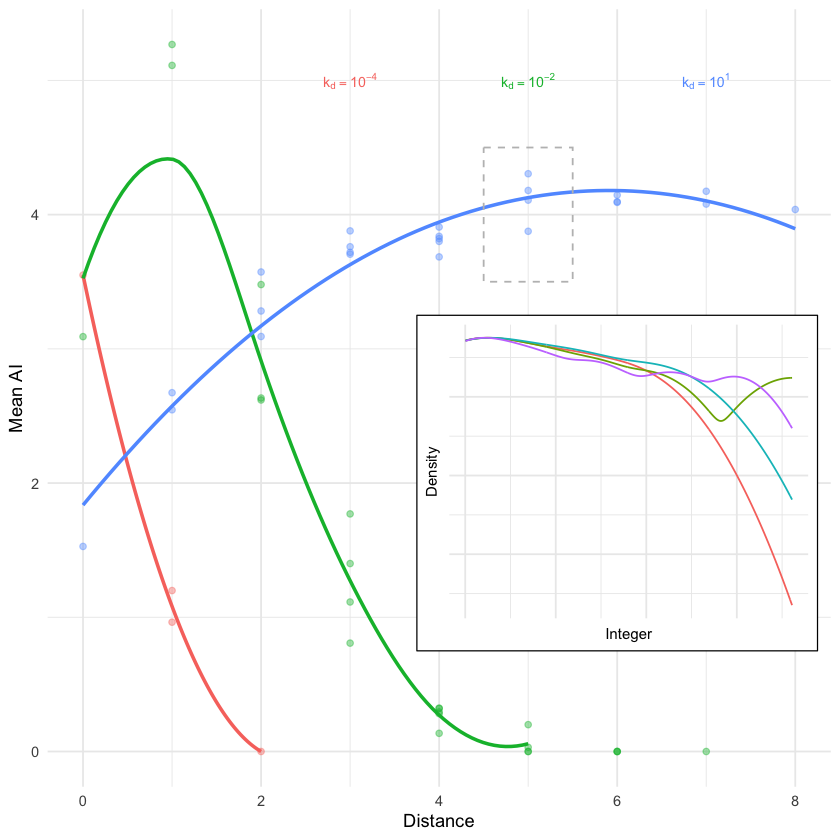

In [334]:
library(grid)

# Convert the inset plot to a grob
inset_grob <- ggplotGrob(p2)

xmin = 3.75
xmax = 8.25
ymin = 0.75
ymax = 3.25

# Add the inset plot to the main plot using annotation_custom()
combined_plot <- p +
  annotation_custom(
    grob = rectGrob(
      gp = gpar(fill = "white", col = "black", lwd = 1) # Rectangle with white fill and black border
    ),
    xmin = xmin, xmax = xmax,
    ymin = ymin, ymax = ymax
  ) +
  annotation_custom(
    grob = inset_grob,
    xmin = xmin, xmax = xmax,
    ymin = ymin, ymax = ymax
  )

# Display the combined plot
print(combined_plot)

ggsave(filename = "figs/08C_distance-from-source.pdf", plot = combined_plot, width = 80, height = 70, units = "mm")